In [1]:
import models
import model_setup
import torch
from torch.utils.data import random_split, DataLoader
import torch.nn as nn
import matplotlib.pyplot as plt
from tqdm import tqdm
from itertools import product
from datetime import datetime
from torchvision import transforms
import seaborn as sns
import scipy.stats as stats

# Setup data

In [2]:
# Load new dataset
dataset = model_setup.load_data(max_files=30_000)

Processing Data: 100%|██████████| 30000/30000 [03:28<00:00, 144.13image/s]


Split the data into training, testing, and validation sets

In [3]:
loader = DataLoader(dataset, batch_size=64, shuffle=True, num_workers=4, pin_memory=True)
train_subset, test_subset, val_subset = random_split(loader.dataset,[0.7,0.2,0.1])
val_size = len(val_subset.indices)
del loader

In [4]:
train_transform = transforms.Compose([
            transforms.ToPILImage(),
            transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.2),
            transforms.GaussianBlur(kernel_size=3),
            transforms.ToTensor()
            # Add any additional preprocessing steps here
        ])

for idx in tqdm(train_subset.indices, total=len(train_subset.indices)):
    input, label = train_subset.dataset.data[idx]
    new_input = train_transform(input*255) / 255
    train_subset.dataset.data[idx] = (new_input, label)



  0%|          | 0/21000 [00:00<?, ?it/s]

100%|██████████| 21000/21000 [07:56<00:00, 44.10it/s] 


In [5]:
train = DataLoader(train_subset, batch_size=64, shuffle=True, num_workers=4, pin_memory=True)
test = DataLoader(test_subset,batch_size=32, shuffle=True, num_workers=4, pin_memory=True)
val = DataLoader(val_subset, batch_size=32, shuffle=True, num_workers=4, pin_memory=True)

# Training

Make a parameter grid

In [6]:
param_grid = {
    'filters': [64, 128],
    'num_conv_layers': [4, 8]
}

# Get all combinations of parameters
combinations = list(product(*param_grid.values()))
combinations

[(64, 4), (64, 8), (128, 4), (128, 8)]

Train all combinations

In [7]:
saved_models = []

model = models.OccModel()
training_info = model.train_model(train, test, epochs=50 , early_stopping_patience=10)
torch.save(model.state_dict(), f"models/points_{datetime.now().strftime('%Y%m%d-%H%M%S')}.pt")
saved_models.append(model)

Epoch 1/50 (Training): 100%|██████████| 329/329 [04:08<00:00,  1.32it/s]


Loss: 0.0092, Mean Absolute Error: 0.08622601663971201, Time remaining: 3:48:24.683678


Epoch 2/50 (Training): 100%|██████████| 329/329 [02:19<00:00,  2.36it/s]


Loss: 0.0013, Mean Absolute Error: 0.07819971406554922, Time remaining: 3:01:09.290448


Epoch 3/50 (Training): 100%|██████████| 329/329 [02:22<00:00,  2.31it/s]


Loss: 0.0011, Mean Absolute Error: 0.07263066746453022, Time remaining: 2:44:05.755191


Epoch 4/50 (Training): 100%|██████████| 329/329 [03:26<00:00,  1.59it/s]


Loss: 0.0009, Mean Absolute Error: 0.06791024098291676, Time remaining: 2:46:53.696806


Epoch 5/50 (Training): 100%|██████████| 329/329 [02:23<00:00,  2.29it/s]


Loss: 0.0008, Mean Absolute Error: 0.06700679182292933, Time remaining: 2:38:22.508565


Epoch 6/50 (Training): 100%|██████████| 329/329 [02:24<00:00,  2.27it/s]


Loss: 0.0006, Mean Absolute Error: 0.06501105187975979, Time remaining: 2:31:05.570228


Epoch 7/50 (Training): 100%|██████████| 329/329 [02:23<00:00,  2.30it/s]


Loss: 0.0005, Mean Absolute Error: 0.06430158353945677, Time remaining: 2:25:00.744614


Epoch 8/50 (Training): 100%|██████████| 329/329 [02:25<00:00,  2.27it/s]


Loss: 0.0005, Mean Absolute Error: 0.06393473157461019, Time remaining: 2:19:55.239090


Epoch 9/50 (Training): 100%|██████████| 329/329 [03:23<00:00,  1.62it/s]


Loss: 0.0005, Mean Absolute Error: 0.06226606611558731, Time remaining: 2:19:39.802220


Epoch 10/50 (Training): 100%|██████████| 329/329 [02:25<00:00,  2.27it/s]


Loss: 0.0004, Mean Absolute Error: 0.06260855702009607, Time remaining: 2:14:37.917560


Epoch 11/50 (Training): 100%|██████████| 329/329 [02:26<00:00,  2.24it/s]


Loss: 0.0004, Mean Absolute Error: 0.06032835898247171, Time remaining: 2:10:53.657526


Epoch 12/50 (Training): 100%|██████████| 329/329 [03:22<00:00,  1.63it/s]


Loss: 0.0004, Mean Absolute Error: 0.06200265969605522, Time remaining: 2:09:26.652648


Epoch 13/50 (Training): 100%|██████████| 329/329 [02:22<00:00,  2.31it/s]


Loss: 0.0004, Mean Absolute Error: 0.06040927902498144, Time remaining: 2:04:46.452831


Epoch 14/50 (Training): 100%|██████████| 329/329 [03:21<00:00,  1.63it/s]


Loss: 0.0005, Mean Absolute Error: 0.058976989853730864, Time remaining: 2:02:58.635096


Epoch 15/50 (Training): 100%|██████████| 329/329 [02:26<00:00,  2.25it/s]


Loss: 0.0004, Mean Absolute Error: 0.05787622490699621, Time remaining: 1:58:40.778560


Epoch 16/50 (Training): 100%|██████████| 329/329 [02:30<00:00,  2.18it/s]


Loss: 0.0004, Mean Absolute Error: 0.059841166646715176, Time remaining: 1:54:45.093874


Epoch 17/50 (Training): 100%|██████████| 329/329 [02:22<00:00,  2.31it/s]


Loss: 0.0004, Mean Absolute Error: 0.05887328956196917, Time remaining: 1:50:43.987812


Epoch 18/50 (Training): 100%|██████████| 329/329 [02:21<00:00,  2.33it/s]


Loss: 0.0004, Mean Absolute Error: 0.05868201183670379, Time remaining: 1:46:37.239392


Epoch 19/50 (Training): 100%|██████████| 329/329 [03:23<00:00,  1.62it/s]


Loss: 0.0004, Mean Absolute Error: 0.05798290551025817, Time remaining: 1:44:28.617012


Epoch 20/50 (Training): 100%|██████████| 329/329 [02:22<00:00,  2.31it/s]


Loss: 0.0004, Mean Absolute Error: 0.06131834483289338, Time remaining: 1:40:33.009630


Epoch 21/50 (Training): 100%|██████████| 329/329 [02:22<00:00,  2.31it/s]


Loss: 0.0003, Mean Absolute Error: 0.05636730350236943, Time remaining: 1:36:42.273223


Epoch 22/50 (Training): 100%|██████████| 329/329 [02:39<00:00,  2.06it/s]


Loss: 0.0003, Mean Absolute Error: 0.058326561796538376, Time remaining: 1:33:14.981476


Epoch 23/50 (Training): 100%|██████████| 329/329 [02:21<00:00,  2.33it/s]


Loss: 0.0004, Mean Absolute Error: 0.05774690771594326, Time remaining: 1:29:30.296490


Epoch 24/50 (Training): 100%|██████████| 329/329 [03:22<00:00,  1.62it/s]


Loss: 0.0003, Mean Absolute Error: 0.056268070784813544, Time remaining: 1:26:55.613104


Epoch 25/50 (Training): 100%|██████████| 329/329 [02:23<00:00,  2.29it/s]


Loss: 0.0002, Mean Absolute Error: 0.05221629897726977, Time remaining: 1:23:13.730200


Epoch 26/50 (Training): 100%|██████████| 329/329 [02:23<00:00,  2.30it/s]


Loss: 0.0001, Mean Absolute Error: 0.050818019150260914, Time remaining: 1:19:33.381624


Epoch 27/50 (Training): 100%|██████████| 329/329 [02:27<00:00,  2.23it/s]


Loss: 0.0001, Mean Absolute Error: 0.05078742833451388, Time remaining: 1:16:04.527054


Epoch 28/50 (Training): 100%|██████████| 329/329 [02:23<00:00,  2.29it/s]


Loss: 0.0001, Mean Absolute Error: 0.051387983513005234, Time remaining: 1:12:31.621560


Epoch 29/50 (Training): 100%|██████████| 329/329 [03:21<00:00,  1.63it/s]


Loss: 0.0001, Mean Absolute Error: 0.05840515902147014, Time remaining: 1:09:43.578336


Epoch 30/50 (Training): 100%|██████████| 329/329 [02:24<00:00,  2.27it/s]


Loss: 0.0003, Mean Absolute Error: 0.05498071857034526, Time remaining: 1:06:12.111300


Epoch 31/50 (Training): 100%|██████████| 329/329 [02:22<00:00,  2.30it/s]


Loss: 0.0002, Mean Absolute Error: 0.05324419076613923, Time remaining: 1:02:41.392684


Epoch 32/50 (Training): 100%|██████████| 329/329 [03:22<00:00,  1.62it/s]


Loss: 0.0001, Mean Absolute Error: 0.050411234926828676, Time remaining: 0:59:45.471318


Epoch 33/50 (Training): 100%|██████████| 329/329 [02:24<00:00,  2.28it/s]


Loss: 0.0001, Mean Absolute Error: 0.04947331690407814, Time remaining: 0:56:20.837192


Epoch 34/50 (Training): 100%|██████████| 329/329 [03:22<00:00,  1.63it/s]


Loss: 0.0001, Mean Absolute Error: 0.04944392178762466, Time remaining: 0:53:21.109584


Epoch 35/50 (Training): 100%|██████████| 329/329 [03:21<00:00,  1.64it/s]


Loss: 0.0001, Mean Absolute Error: 0.04975738267394456, Time remaining: 0:50:18.439815


Epoch 36/50 (Training): 100%|██████████| 329/329 [03:25<00:00,  1.60it/s]


Loss: 0.0001, Mean Absolute Error: 0.05002569327963159, Time remaining: 0:47:14.606684


Epoch 37/50 (Training): 100%|██████████| 329/329 [03:26<00:00,  1.60it/s]


Loss: 0.0001, Mean Absolute Error: 0.05002183187752962, Time remaining: 0:44:07.493121


Epoch 38/50 (Training): 100%|██████████| 329/329 [02:22<00:00,  2.31it/s]


Loss: 0.0001, Mean Absolute Error: 0.05019171906516273, Time remaining: 0:40:36.651840


Epoch 39/50 (Training): 100%|██████████| 329/329 [03:23<00:00,  1.62it/s]


Loss: 0.0001, Mean Absolute Error: 0.05212180560177311, Time remaining: 0:37:25.571812


Epoch 40/50 (Training): 100%|██████████| 329/329 [03:21<00:00,  1.63it/s]


Loss: 0.0001, Mean Absolute Error: 0.050094969748975114, Time remaining: 0:34:11.254170


Epoch 41/50 (Training): 100%|██████████| 329/329 [03:20<00:00,  1.64it/s]


Loss: 0.0000, Mean Absolute Error: 0.04959508972836936, Time remaining: 0:30:54.071190


Epoch 42/50 (Training): 100%|██████████| 329/329 [03:21<00:00,  1.64it/s]


Loss: 0.0000, Mean Absolute Error: 0.04921514344738519, Time remaining: 0:27:34.242888
Early stopping at epoch 42 due to no improvement in validation loss.
Best Validation Loss: 0.0001 at epoch 32


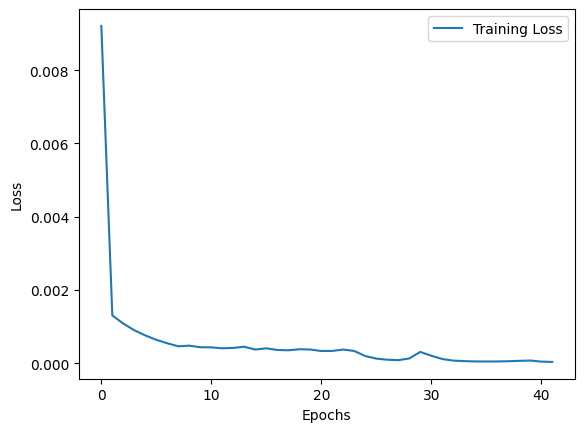

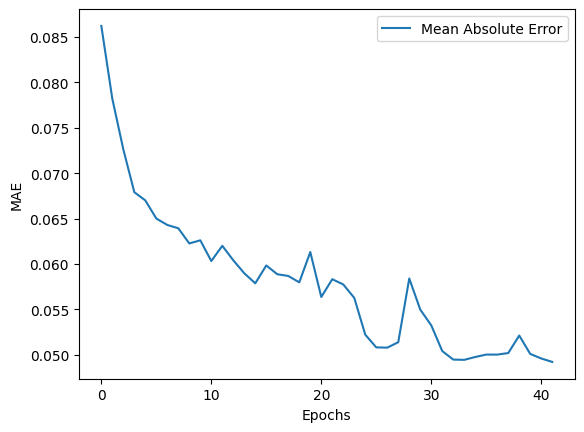

In [8]:
# Plot loss and root mean square error
# Plot training loss
plt.plot(training_info['loss'], label='Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot validation accuracy
plt.plot(training_info['mae'], label='Mean Absolute Error')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()
plt.show()


# Validation

--------------------------------------------------------


Evaluating:   0%|          | 0/94 [00:00<?, ?it/s]

Evaluating: 100%|██████████| 94/94 [00:32<00:00,  2.91it/s]
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


[0.10818417370319366, 0.035228606313467026, 0.06338996440172195, 0.06805993616580963, 0.09643242508172989, 0.06298980861902237, 0.059209518134593964, 0.08653777092695236, 0.05411428213119507, 0.03742546960711479, 0.03568602725863457, 0.05252968519926071, 0.032174546271562576, 0.04995173588395119, 0.06622909754514694, 0.03654176741838455, 0.042311787605285645, 0.08758050203323364, 0.02965913526713848, 0.06782371550798416, 0.03903752192854881, 0.10807494074106216, 0.07871710509061813, 0.04367940500378609, 0.1054016575217247, 0.10033927112817764, 0.056390125304460526, 0.08395326882600784, 0.12526215612888336, 0.05640266090631485, 0.04858453944325447, 0.06129247695207596, 0.061093345284461975, 0.02404891699552536, 0.09020695835351944, 0.066295325756073, 0.043772678822278976, 0.045119982212781906, 0.036612965166568756, 0.06713219732046127, 0.057409558445215225, 0.033347830176353455, 0.0842989906668663, 0.03707987815141678, 0.038023702800273895, 0.13541622459888458, 0.10037165135145187, 0.09

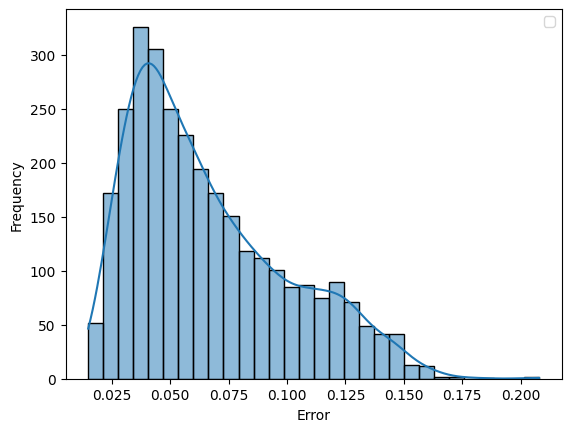

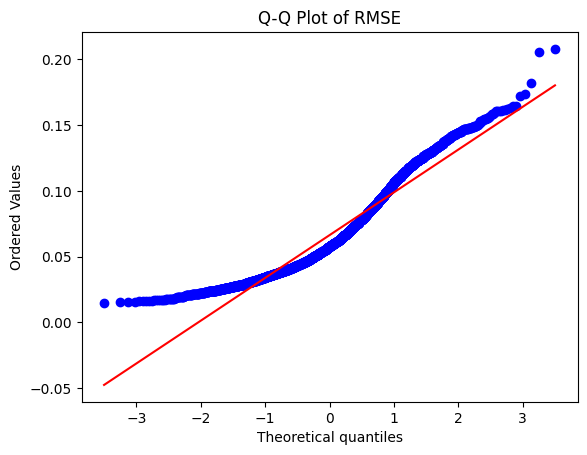

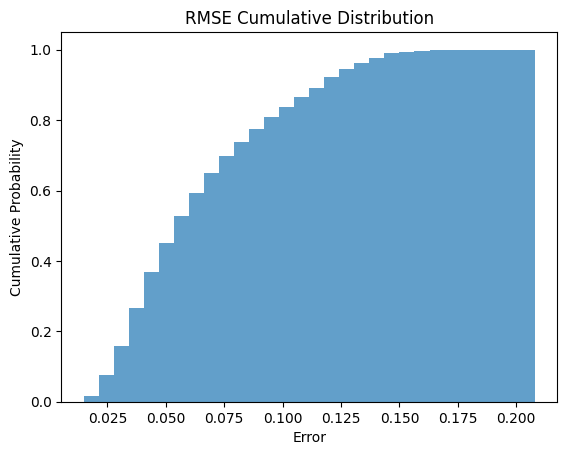

(3000, 21, 3)


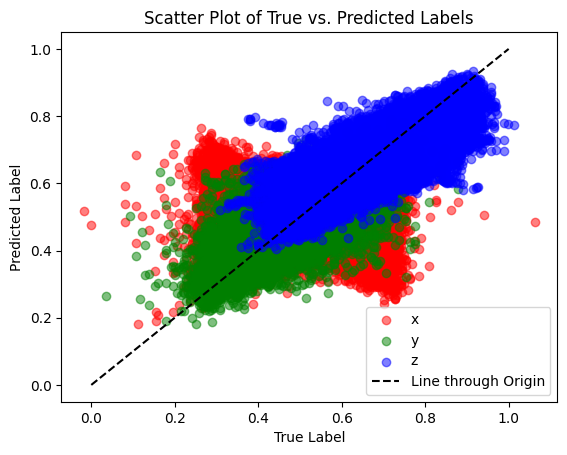

In [9]:
for idx, model in enumerate(saved_models):
    true_labels = []
    predicted_labels = []
    num_layers, filters = combinations[idx]
    print("--------------------------------------------------------")

    # Set the model to evaluation mode
    model.eval()
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    rmse_list = []
    # Loop through the validation dataloader
    with torch.no_grad():
        for inputs, labels in tqdm(val, total=len(val), desc="Evaluating"):
            outputs = model(inputs.to(device))
            true_labels.extend(labels.tolist())
            predicted_labels.extend(outputs.tolist())
            for output, label in zip(outputs, labels.to(device)):
                mse = nn.MSELoss()(output, label)
                rmse = torch.sqrt(mse)
                rmse_list.append(float(rmse))

    print(rmse_list)

    sns.histplot(rmse_list, kde=True)
    # plt.hist(rmse_list, kde=True)
    plt.xlabel('Error')
    plt.ylabel('Frequency')
    plt.legend()
    plt.show()
    
    

    stats.probplot(rmse_list, dist="norm", plot=plt)
    plt.title("Q-Q Plot of RMSE")
    plt.show()
    
    plt.hist(rmse_list, cumulative=True, density=True, bins=30, alpha=0.7)
    plt.xlabel('Error')
    plt.ylabel('Cumulative Probability')
    plt.title(f'RMSE Cumulative Distribution')
    plt.show()
    import numpy as np
    print(np.array(true_labels).shape)
    true_array = np.array(true_labels)
    pred_array = np.array(predicted_labels)
    plt.scatter(true_array[:, :, 0], pred_array[:, :, 0], alpha=0.5, c='r', label="x")
    plt.scatter(true_array[:, :, 1], pred_array[:, :, 1], alpha=0.5, c='g', label="y")
    plt.scatter(true_array[:, :, 2], pred_array[:, :, 2], alpha=0.5, c='b', label="z")
    line_x = np.linspace(0, 1, 100)
    line_y = line_x  # y = x for the line going through the origin

    plt.plot(line_x, line_y, color='black', linestyle='--', label='Line through Origin')
    plt.legend()
    plt.xlabel('True Label')
    plt.ylabel('Predicted Label')
    plt.title('Scatter Plot of True vs. Predicted Labels')
    plt.show()

In [10]:
# from PIL import Image
# from os import listdir
# import torch.nn.functional as F

# image_head = "../images/"
# paths = listdir(image_head)

# transform = transforms.Compose({
#     transforms.Resize((224, 224)),
#     transforms.ToTensor()
# })

# for path in paths:
#     image = Image.open(image_head+path)
#     image = transform(image) / 255
#     output = model(torch.stack([image]).to(device))
#     print(torch.argmax(output),F.softmax(output, dim=1).tolist())

In [11]:
old_model = model

0.671138346195221
0.6039829850196838
0.5639163851737976
0.5192358493804932
0.4608847200870514
0.48924049735069275
0.4120226204395294
0.3637606203556061
0.30729934573173523
0.4670150876045227
0.38654252886772156
0.33157879114151
0.26650315523147583
0.47351810336112976
0.40232306718826294
0.35738882422447205
0.3023894429206848
0.4894374907016754
0.43906259536743164
0.40071141719818115
0.36623769998550415


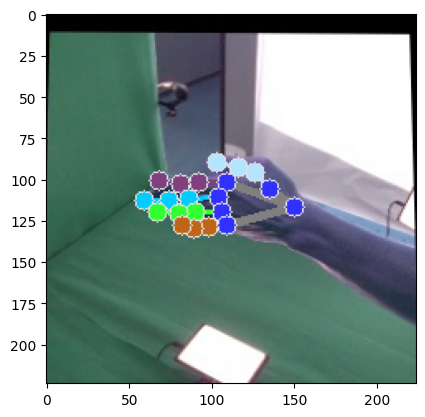

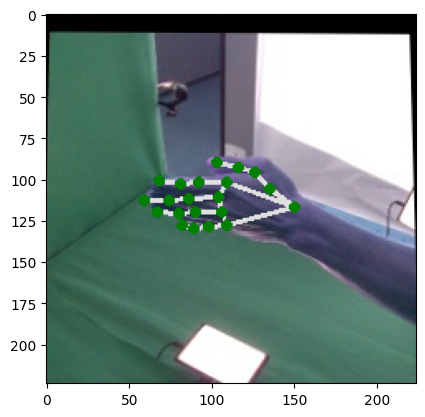

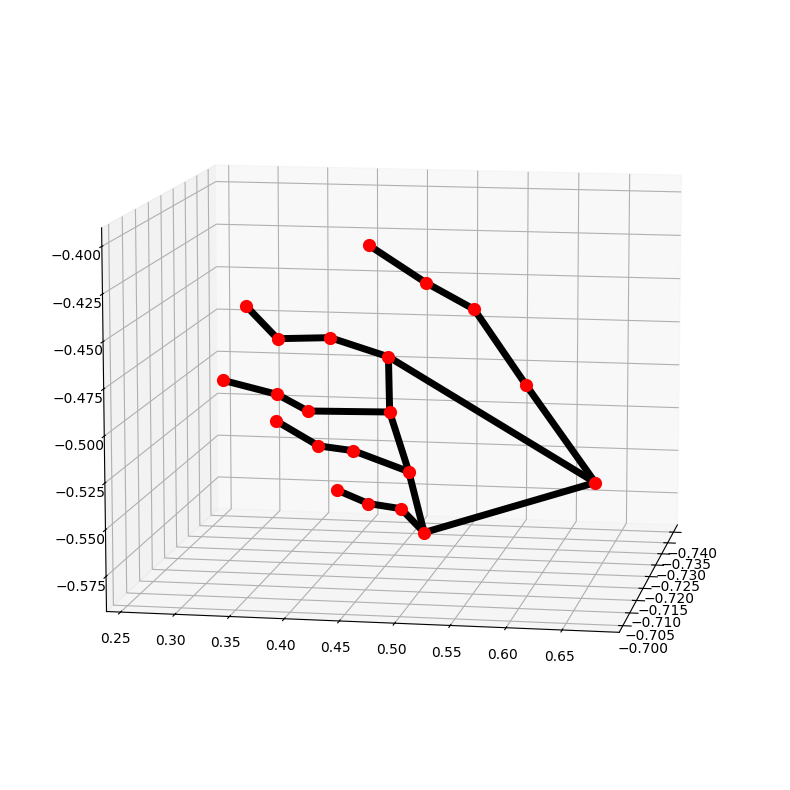

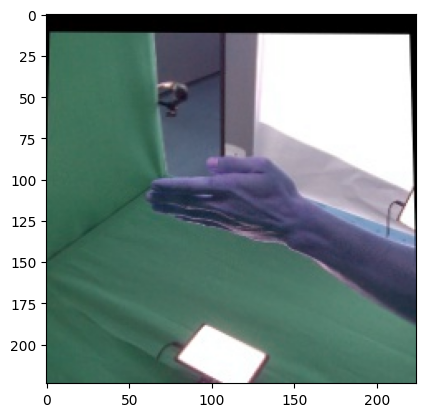

: 

In [28]:
import cv2
from PIL import Image
import mediapipe as mp
import mediapipe.framework.formats.landmark_pb2 as landmark_pb2
from google.protobuf import text_format
import points_displayer
from torchvision import transforms
import matplotlib.pyplot as plt
import torch
import models
from importlib import reload

reload(models)


device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

file = "/home/devcontainers/third-year-project/data/freihand/left/training/rgb/00009999.jpg"
# file = "/home/devcontainers/third-year-project/data/F-PHAB/Video_files/Subject_1/charge_cell_phone/1/color/color_0047.jpeg"
image = Image.open(file)

# model = models.PointLabellingModel().to(device)


# model.load_state_dict(torch.load("models/points_20231228-024753.pt"))
model = old_model
model.eval()
transform = transforms.Compose({
    # transforms.Resize((224, 224)),
    transforms.ToTensor()
})

# image.resize(224,224)

image = transform(image) / 255

joints = model(torch.stack([image]).to(device))



mp_hands = mp.solutions.hands
mp_drawing = mp.solutions.drawing_utils
mp_drawing_styles = mp.solutions.drawing_styles

landmarks = ""
for X, Y, Z in joints[0]:
    formatted_string = f"landmark {{x: {X} y: {Y} z: {Z}}} "
    landmarks = landmarks + formatted_string

hand_landmarks = text_format.Parse(
    landmarks,
    landmark_pb2.NormalizedLandmarkList())

img = cv2.imread(file)
img2 = cv2.imread(file)
# img = cv2.resize(img, (224,224))
mp_drawing.draw_landmarks(
            img,
            hand_landmarks,
            mp_hands.HAND_CONNECTIONS,
            mp_drawing_styles.get_default_hand_landmarks_style(),
            mp_drawing_styles.get_default_hand_connections_style())
points_displayer.draw_landmarks(img2, joints.cpu().detach().numpy().tolist()[0])
plt.imshow(img)
plt.show()
plt.imshow(img2)
plt.show()

mp_drawing.plot_landmarks(
                    hand_landmarks,
                    mp_hands.HAND_CONNECTIONS)
plt.imshow(cv2.imread(file))